In [1]:
import sys,importlib
sys.path.append('../')
import simulation
from numpy import *
from sympy import *
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline
init_printing()

In [135]:
Variables=symbols("x1 y1 z1 x2 y2 z2")
x1,y1,z1,x2,y2,z2 = Variables
Time=symbols("t")
t=Time
Parameters = symbols("sigma beta rho  w a0 a1 omega")
sigma,beta,rho,w,a0,a1,omega = Parameters

### Lorenz System

In [3]:
F=Matrix([sigma*(y1-x1),x1*(rho-z1)-y1,x1*y1-beta*z1,
          sigma*(y2-x2),x2*(rho-z2)-y2,x2*y2-beta*z2])
F

⎡  σ⋅(-x₁ + y₁)  ⎤
⎢                ⎥
⎢x₁⋅(ρ - z₁) - y₁⎥
⎢                ⎥
⎢ -β⋅z₁ + x₁⋅y₁  ⎥
⎢                ⎥
⎢  σ⋅(-x₂ + y₂)  ⎥
⎢                ⎥
⎢x₂⋅(ρ - z₂) - y₂⎥
⎢                ⎥
⎣ -β⋅z₂ + x₂⋅y₂  ⎦

In [4]:
zeta=Matrix([0,0,0,
             0,0,0])

zeta

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

### Synchrony

In [5]:
phi=Matrix([(x2-x1-(a0 + a1*sin(w*t))), y2-y1, z2-z1])
phi

⎡-a₀ - a₁⋅sin(t⋅w) - x₁ + x₂⎤
⎢                           ⎥
⎢         -y₁ + y₂          ⎥
⎢                           ⎥
⎣         -z₁ + z₂          ⎦

In [6]:
N=simulation.VectorDivergence(phi,Variables)
N

⎡-1  0   0   1  0  0⎤
⎢                   ⎥
⎢0   -1  0   0  1  0⎥
⎢                   ⎥
⎣0   0   -1  0  0  1⎦

In [7]:
on_manifold = [(x2,x1+(a0 + a1*sin(w*t))),(y2,y1),(z2,z1)]


### Invariance

In [8]:
NF=N*(F+zeta)
NF

⎡    -σ⋅(-x₁ + y₁) + σ⋅(-x₂ + y₂)    ⎤
⎢                                    ⎥
⎢-x₁⋅(ρ - z₁) + x₂⋅(ρ - z₂) + y₁ - y₂⎥
⎢                                    ⎥
⎣    β⋅z₁ - β⋅z₂ - x₁⋅y₁ + x₂⋅y₂     ⎦

In [9]:
dPhi=diff(phi,Time)
dPhi

⎡-a₁⋅w⋅cos(t⋅w)⎤
⎢              ⎥
⎢      0       ⎥
⎢              ⎥
⎣      0       ⎦

In [10]:
eqn=(NF+dPhi)
simplify(eqn)

⎡-a₁⋅w⋅cos(t⋅w) + σ⋅(x₁ - y₁) - σ⋅(x₂ - y₂)⎤
⎢                                          ⎥
⎢   -x₁⋅(ρ - z₁) + x₂⋅(ρ - z₂) + y₁ - y₂   ⎥
⎢                                          ⎥
⎣       β⋅z₁ - β⋅z₂ - x₁⋅y₁ + x₂⋅y₂        ⎦

In [11]:
zeta[3]=-(eqn)[0]
zeta[4]=-(eqn)[1]
zeta[5]=-(eqn)[2]
simplify(zeta)

⎡                    0                    ⎤
⎢                                         ⎥
⎢                    0                    ⎥
⎢                                         ⎥
⎢                    0                    ⎥
⎢                                         ⎥
⎢a₁⋅w⋅cos(t⋅w) - σ⋅(x₁ - y₁) + σ⋅(x₂ - y₂)⎥
⎢                                         ⎥
⎢   x₁⋅(ρ - z₁) - x₂⋅(ρ - z₂) - y₁ + y₂   ⎥
⎢                                         ⎥
⎣      -β⋅z₁ + β⋅z₂ + x₁⋅y₁ - x₂⋅y₂       ⎦

In [12]:
zeta=zeta.subs(on_manifold)
#zeta = simplify(zeta)
zeta

⎡                              0                               ⎤
⎢                                                              ⎥
⎢                              0                               ⎥
⎢                                                              ⎥
⎢                              0                               ⎥
⎢                                                              ⎥
⎢a₁⋅w⋅cos(t⋅w) + σ⋅(-x₁ + y₁) - σ⋅(-a₀ - a₁⋅sin(t⋅w) - x₁ + y₁)⎥
⎢                                                              ⎥
⎢        x₁⋅(ρ - z₁) - (ρ - z₁)⋅(a₀ + a₁⋅sin(t⋅w) + x₁)        ⎥
⎢                                                              ⎥
⎣              x₁⋅y₁ - y₁⋅(a₀ + a₁⋅sin(t⋅w) + x₁)              ⎦

In [13]:
NF=N*(F+zeta)
simplify(NF)
simplify(NF+dPhi).subs(on_manifold)

⎡                                 0                                  ⎤
⎢                                                                    ⎥
⎢(-ρ + z₁)⋅(a₀ + a₁⋅sin(t⋅w) + x₁) + (ρ - z₁)⋅(a₀ + a₁⋅sin(t⋅w) + x₁)⎥
⎢                                                                    ⎥
⎣                                 0                                  ⎦

In [14]:
NZ=N*zeta
NZ

⎡a₁⋅w⋅cos(t⋅w) + σ⋅(-x₁ + y₁) - σ⋅(-a₀ - a₁⋅sin(t⋅w) - x₁ + y₁)⎤
⎢                                                              ⎥
⎢        x₁⋅(ρ - z₁) - (ρ - z₁)⋅(a₀ + a₁⋅sin(t⋅w) + x₁)        ⎥
⎢                                                              ⎥
⎣              x₁⋅y₁ - y₁⋅(a₀ + a₁⋅sin(t⋅w) + x₁)              ⎦

### Stability

In [239]:
chi=Matrix([0,0,0,
            -sigma*(y2-y1+z2-z1),-(rho-z1)*(x2-x1-(a0+a1*sin(w*t))),-(y2-y1)-(x2-x1-(a0+a1*sin(w*t)))])
            #(z2-z1),-(y2-y1)+(x2-x1-(a0+a1*sin(w*t))),-x2*(z2-z1)])


chi

⎡                   0                   ⎤
⎢                                       ⎥
⎢                   0                   ⎥
⎢                                       ⎥
⎢                   0                   ⎥
⎢                                       ⎥
⎢        -σ⋅(-y₁ + y₂ - z₁ + z₂)        ⎥
⎢                                       ⎥
⎢(-ρ + z₁)⋅(-a₀ - a₁⋅sin(t⋅w) - x₁ + x₂)⎥
⎢                                       ⎥
⎣ a₀ + a₁⋅sin(t⋅w) + x₁ - x₂ + y₁ - y₂  ⎦

In [240]:
del_zeta=simulation.VectorDivergence(zeta,Variables)
del_zeta

⎡0          0                 0          0  0  0⎤
⎢                                               ⎥
⎢0          0                 0          0  0  0⎥
⎢                                               ⎥
⎢0          0                 0          0  0  0⎥
⎢                                               ⎥
⎢0          0                 0          0  0  0⎥
⎢                                               ⎥
⎢0          0          a₀ + a₁⋅sin(t⋅w)  0  0  0⎥
⎢                                               ⎥
⎣0  -a₀ - a₁⋅sin(t⋅w)         0          0  0  0⎦

In [241]:
del_chi=simulation.VectorDivergence(chi,Variables)
del_chi

⎡  0     0               0                  0     0   0 ⎤
⎢                                                       ⎥
⎢  0     0               0                  0     0   0 ⎥
⎢                                                       ⎥
⎢  0     0               0                  0     0   0 ⎥
⎢                                                       ⎥
⎢  0     σ               σ                  0     -σ  -σ⎥
⎢                                                       ⎥
⎢ρ - z₁  0  -a₀ - a₁⋅sin(t⋅w) - x₁ + x₂  -ρ + z₁  0   0 ⎥
⎢                                                       ⎥
⎣  1     1               0                 -1     -1  0 ⎦

In [242]:
del_F=simulation.VectorDivergence(F,Variables)
del_F

⎡  -σ    σ    0     0     0    0 ⎤
⎢                                ⎥
⎢ρ - z₁  -1  -x₁    0     0    0 ⎥
⎢                                ⎥
⎢  y₁    x₁  -β     0     0    0 ⎥
⎢                                ⎥
⎢  0     0    0     -σ    σ    0 ⎥
⎢                                ⎥
⎢  0     0    0   ρ - z₂  -1  -x₂⎥
⎢                                ⎥
⎣  0     0    0     y₂    x₂  -β ⎦

In [243]:
(del_F+del_zeta+del_chi)

⎡  -σ              σ               0         0       0      0 ⎤
⎢                                                             ⎥
⎢ρ - z₁           -1              -x₁        0       0      0 ⎥
⎢                                                             ⎥
⎢  y₁             x₁               -β        0       0      0 ⎥
⎢                                                             ⎥
⎢  0               σ               σ        -σ       0     -σ ⎥
⎢                                                             ⎥
⎢ρ - z₁            0            -x₁ + x₂  z₁ - z₂    -1    -x₂⎥
⎢                                                             ⎥
⎣  1     -a₀ - a₁⋅sin(t⋅w) + 1     0      y₂ - 1   x₂ - 1  -β ⎦

In [244]:
N*(del_F+del_zeta+del_chi)

⎡  σ                 0               σ     -σ       0     -σ ⎤
⎢                                                            ⎥
⎢  0                 1               x₂  z₁ - z₂    -1    -x₂⎥
⎢                                                            ⎥
⎣1 - y₁  -a₀ - a₁⋅sin(t⋅w) - x₁ + 1  β   y₂ - 1   x₂ - 1  -β ⎦

In [245]:
diff(N,t)*N.transpose()

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [246]:
Jac = N*(del_F+del_zeta+del_chi)*N.transpose() + diff(N,t)*N.transpose()
Jac = simplify(Jac)
Jac=Jac.subs(on_manifold)
Jac

⎡  -2⋅σ                   0                             -2⋅σ            ⎤
⎢                                                                       ⎥
⎢   0                    -2                 -2⋅a₀ - 2⋅a₁⋅sin(t⋅w) - 2⋅x₁⎥
⎢                                                                       ⎥
⎣2⋅y₁ - 2  2⋅a₀ + 2⋅a₁⋅sin(t⋅w) + 2⋅x₁ - 2              -2⋅β            ⎦

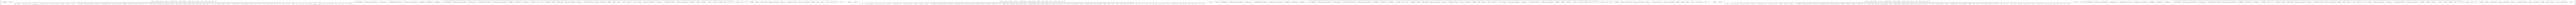

In [230]:
Jac.eigenvals()

In [132]:
beta=8/3
sigma = 10
(sigma-beta)**2